
<br>
<font face="Times New Roman">
<div dir=ltr align=center>
<font color=0F5298 size=7>
Digital Image Processing <br>
<font color=2565AE size=5>
Department Of Mathematical Sciences <br>
Spring 2025<br>
<font color=3C99D size=5>
Assignment 3 <br>
</div>


---



### Full Name : Nazanin Yousefi
### Student Number : 401110172
___

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

First, read the image:

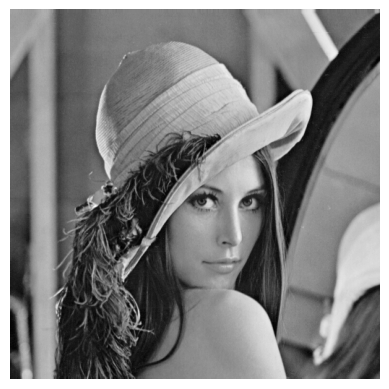

In [3]:
gray = cv2.imread("lena.png", 0)
plt.axis('off')
plt.imshow(gray, cmap="gray")

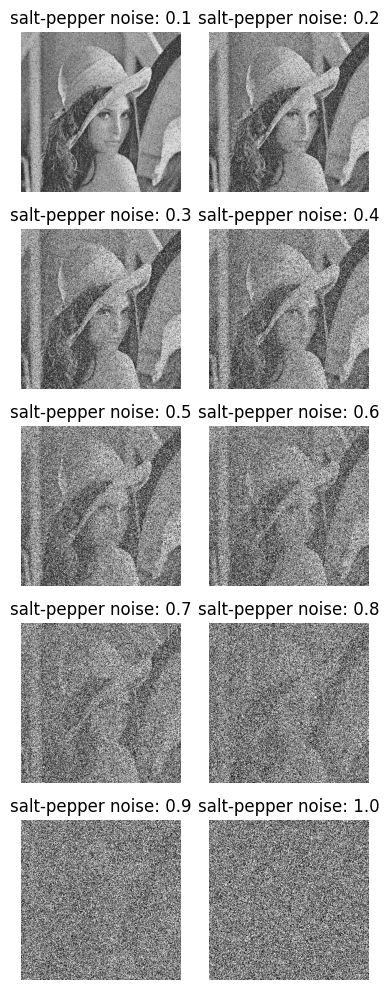

In [4]:
def sp(pic, n):

    ######################## YOUR CODE GOES HERE ########################

    noise_img = pic.copy()
    
    random_values = np.random.rand(*pic.shape)
    
    salt_mask = random_values < n/2
    noise_img[salt_mask] = 255
    
    # Add pepper noise (black pixels = 0)
    pepper_mask = (random_values >= n/2) & (random_values < n)
    noise_img[pepper_mask] = 0

    ######################### END OF YOUR CODE ##########################

    return noise_img

a = []
for i in range(1, 11):
    a.append(sp(gray, 0.1 * i))

fig, axes = plt.subplots(5, 2, figsize=(4, 10))
axes = axes.flatten()

for idx, (ax, img) in enumerate(zip(axes, a)):
    ax.imshow(img, cmap='gray')
    ax.set_title(f"salt-pepper noise: {np.round((idx + 1) * 0.1, 2)}")
    ax.axis('off')

plt.tight_layout()
plt.show()

Implement a function that takes a noisy image as input and applies a mean filter of size kernel_size * kernel_size on it. Use numpy only.



In [5]:

def apply_mean_filter(image, kernel_size):
    """
    Apply an n x n mean filter to the input image using zero padding.

    Parameters:
        image (np.ndarray): Grayscale image
        kernel_size (int): Size of the mean filter (must be odd)

    Returns:
        np.ndarray: Filtered image of same shape
    """
    ######################## YOUR CODE GOES HERE ########################

    # filtered_image = None

    # image dimensions
    rows, cols = image.shape
    
    # Apply zero padding
    pad_size = kernel_size // 2
    padded_image = np.pad(image, pad_size, mode='constant', constant_values=0)
    
    # Initialize output image
    filtered_image = np.zeros_like(image, dtype=np.float64)
    
    # Apply mean filter
    for i in range(rows):
        for j in range(cols):
            # Extract the kernel region
            kernel_region = padded_image[i:i+kernel_size, j:j+kernel_size]
            # Calculate mean and assign to output
            filtered_image[i, j] = np.mean(kernel_region)
    
    filtered_image = filtered_image.astype(np.uint8)

    ######################### END OF YOUR CODE ##########################

    return filtered_image


In [6]:
def display_results(noisy_image, method_function, filter_name):
    pics = [noisy_image]
    titles = ["Original noisy image"]
    kernel_sizes = [3, 5, 7]
    for i, k in enumerate(kernel_sizes):
        filtered_image = method_function(a[0], k)
        pics.append(filtered_image)
        titles.append(f"{filter_name} filter with kernel size {k}")

    fig, axes = plt.subplots(2, 2, figsize=(10, 10))
    axes = axes.flatten()

    for idx, (ax, img) in enumerate(zip(axes, pics)):
        ax.imshow(img, cmap='gray')
        ax.set_title(titles[idx])
        ax.axis('off')

    plt.tight_layout()
    plt.show()


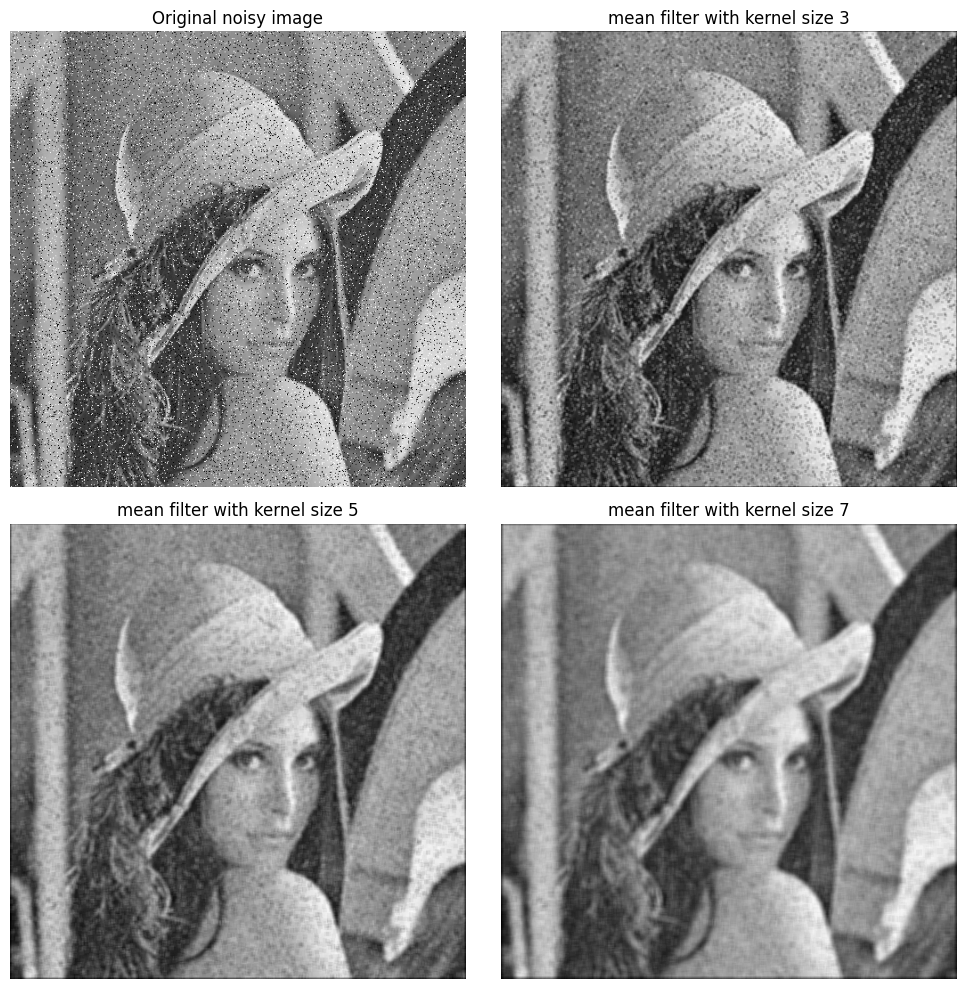

In [ ]:
display_results(a[0], apply_mean_filter, filter_name="mean")

###Theory Question:
Explain the reason behind the differences between the outputs of a 3✕3, 5✕5, and 7✕7 mean filter.

###Your Answer:

A mean filter is a linear spatial smoothing filter that replaces the value of each pixel in an output image with the average (mean) of the pixel values in a neighborhood (window or kernel) centered on that pixel in the input image. The size of this neighborhood (e.g., $3 \times 3$, $5 \times 5$, or $7 \times 7$) significantly impacts the filter's output. The primary reasons for the differences in outputs are as follows:

1.  **Degree of Smoothing (Blurring):**
    *   **$3 \times 3$ Filter:** Uses the smallest window (9 pixels). This results in gentler smoothing. Fine details and sharp edges are somewhat preserved, while high-frequency noise is moderately reduced.
    *   **$5 \times 5$ Filter:** Uses a larger window (25 pixels). Averaging over more pixels leads to a stronger smoothing effect. The output image will be blurrier than with the $3 \times 3$ filter, and more fine details will be lost. Edges will also appear more blurred.
    *   **$7 \times 7$ Filter:** Uses the largest window (49 pixels). This applies the most significant amount of smoothing. The output image will be much blurrier, fine details will be almost entirely lost, and edges will be severely blurred.
    *   **Reasoning:** The larger the mean filter's window, the less influence the central pixel's original value has, and the more influence distant pixels within the neighborhood have. This extensive averaging attenuates abrupt intensity changes (like noise or sharp edges) more effectively, making the image more uniform (blurrier).

2.  **Noise Reduction Capability:**
    *   Mean filters reduce noise like Gaussian noise or, to some extent, salt-and-pepper noise (though median filters are generally better for the latter).
    *   **$3 \times 3$ Filter:** Reduces noise to some extent but might be insufficient for severe noise.
    *   **$5 \times 5$ Filter:** Reduces noise more effectively than the $3 \times 3$ filter as averaging over a larger area better mitigates individual noisy pixels.
    *   **$7 \times 7$ Filter:** Offers the highest noise reduction but at the cost of significant detail loss.
    *   **Reasoning:** With an increased window size, a noisy pixel is more likely to be averaged with a larger number of non-noisy pixels, thus diminishing its effect.

3.  **Preservation of Details and Edges:**
    *   **$3 \times 3$ Filter:** Best preserves fine details and edge sharpness among the three (though it still introduces some blurring).
    *   **$5 \times 5$ Filter:** Blurs details and edges more than the $3 \times 3$ filter.
    *   **$7 \times 7$ Filter:** Preserves the least detail and causes the most significant edge blurring. Thin lines or small features might be completely obliterated.
    *   **Reasoning:** Edges and details represent rapid intensity changes. Averaging smooths these out. The larger the window, the more widespread this smoothing, causing edges to become wider and more diffuse.

4.  **Computational Complexity:**
    *   For an $M \times N$ image and a $k \times k$ filter:
        *   $3 \times 3$ filter: Approx. $3^2 = 9$ operations (summations and one division) per output pixel.
        *   $5 \times 5$ filter: Approx. $5^2 = 25$ operations per output pixel.
        *   $7 \times 7$ filter: Approx. $7^2 = 49$ operations per output pixel.
    *   Computational complexity increases with filter size (roughly $O(k^2)$ per pixel for direct implementation). Efficient algorithms (e.g., using an integral image or separable filters, as the mean filter is separable) can reduce this, but the trend of increased computation with kernel size remains.

**Summary:**

The primary difference between the outputs of mean filters of varying sizes lies in the **degree of smoothing (blurring)**. As the filter window size increases:
*   The amount of blurring and smoothing increases.
*   The ability to reduce noise (especially more widespread noise) increases.
*   The preservation of fine details and edge sharpness decreases.
*   The computational complexity (for direct implementation) increases.

The choice of an appropriate filter size depends on the specific application, the amount of noise present, and the desired level of detail in the output image. There is a trade-off between noise reduction and the preservation of image details.

Use cv2's built-in function(s) to do the same as the mean filter you implemented above.



In [ ]:
def builtin_mean_filter(image, kernel_size):
    ######################## YOUR CODE GOES HERE ########################

    filtered_image = None

    ######################### END OF YOUR CODE ##########################
    return filtered_image

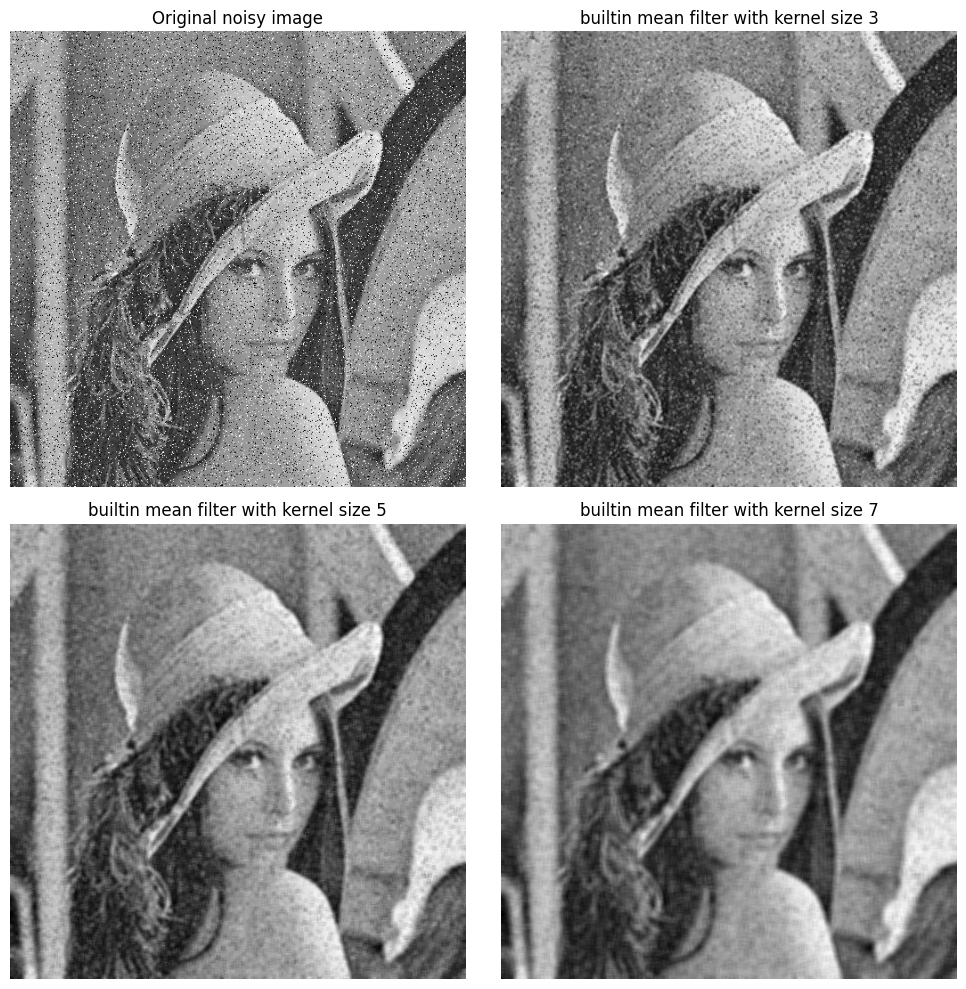

In [ ]:
display_results(a[0], builtin_mean_filter, filter_name="builtin mean")

Implement a function that takes a noisy image as input and applies a median filter of size kernel_size * kernel_size on it. Use numpy only.

In [ ]:
def apply_median_filter(image, kernel_size):
    """
    Apply an n x n median filter to a grayscale image using zero padding.

    Parameters:
        image (np.ndarray): 2D grayscale image
        kernel_size (int): Size of the filter kernel (must be odd)

    Returns:
        np.ndarray: Filtered image
    """
    ######################## YOUR CODE GOES HERE ########################

    filtered_image = None

    ######################### END OF YOUR CODE ##########################

    return filtered_image

In [ ]:
display_results(a[0], apply_median_filter, filter_name="median")

### Theory Question:
Explain the reason behind the differences between the outputs of a 3✕3, 5✕5, and 7✕7 mean filter.

### Your Answer:

The differences in outputs from $3 \times 3$, $5 \times 5$, and $7 \times 7$ mean filters are primarily due to the varying **extent of averaging** performed by each filter, which is dictated by its window (kernel) size.

1.  **Degree of Smoothing (Blurring):**
    *   **Larger filters ($7 \times 7 > 5 \times 5 > 3 \times 3$) average pixel values over a wider area.** This results in:
        *   **Increased blurring:** The output becomes progressively smoother and blurrier as the filter size increases. Fine details are lost more significantly with larger filters.
        *   **Stronger noise reduction:** Larger filters are more effective at suppressing noise because the influence of any single noisy pixel is diminished by averaging with more neighboring pixels.
        *   **Greater loss of detail and edge sharpness:** Edges, which represent sharp intensity changes, become more spread out and less distinct with larger averaging windows.

2.  **Computational Cost:**
    *   Larger filters require more calculations per pixel (e.g., a $7 \times 7$ filter processes $49$ pixels per output, versus $9$ for a $3 \times 3$ filter in a direct implementation), leading to increased processing time.

**In essence:**
*   A **$3 \times 3$ mean filter** provides mild smoothing, some noise reduction, and better preservation of details and edges compared to larger filters.
*   A **$5 \times 5$ mean filter** offers a moderate balance, with more significant smoothing and noise reduction than the $3 \times 3$, but also more blurring of details.
*   A **$7 \times 7$ mean filter** results in strong smoothing, substantial noise reduction, but also causes significant blurring and loss of fine details and sharp edges.

The choice of filter size is a trade-off: larger filters reduce more noise but at the cost of image sharpness and detail.

Use cv2's built-in function(s) to do the same as the median filter you implemented above.

In [8]:
def builtin_median_filter(image, kernel_size):
    ######################## YOUR CODE GOES HERE ########################

    # filtered_image = None
    kernel = np.ones((kernel_size, kernel_size), np.float32) / (kernel_size * kernel_size)

    filtered_image = cv2.filter2D(image, -1, kernel)

    ######################### END OF YOUR CODE ##########################
    return filtered_image

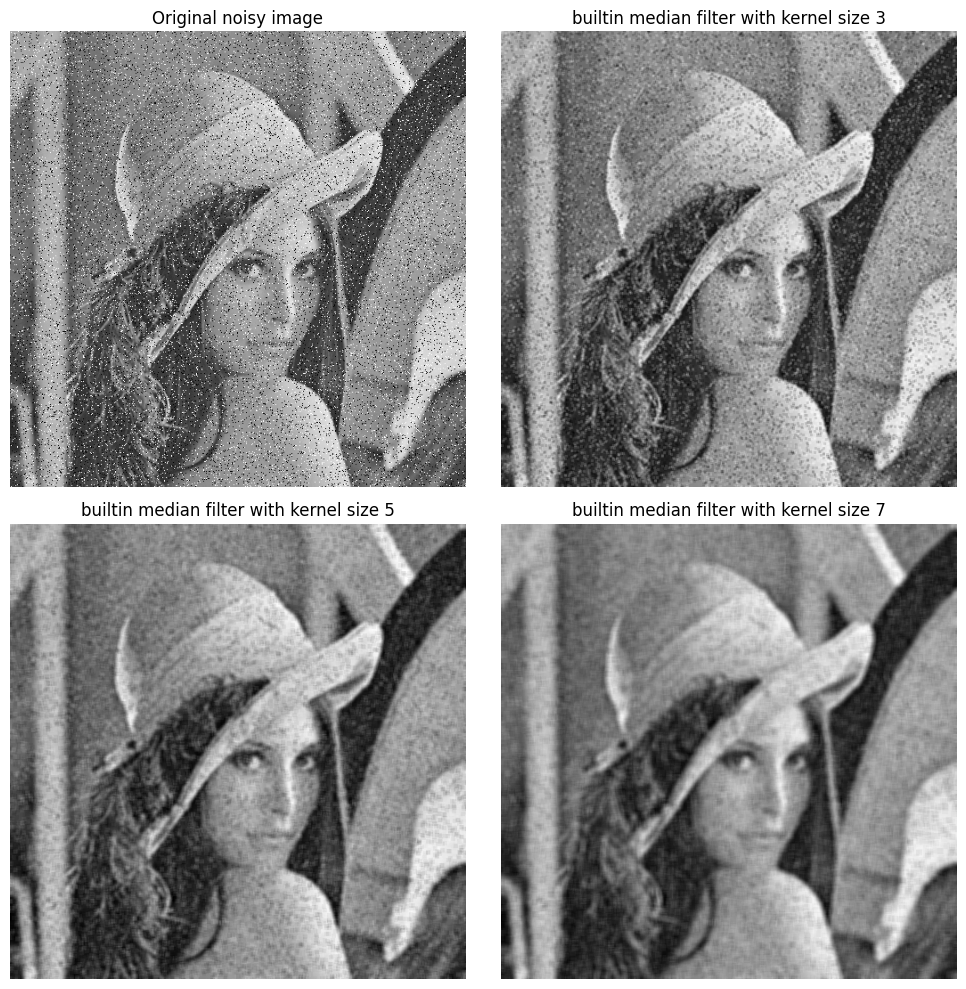

In [9]:
display_results(a[0], builtin_median_filter, filter_name="builtin median")

### Theory Question:
Explain the reason behind the differences between the outputs of a mean and median filter of the same size. Which one performs better on the task of removing salt and pepper noise? why?

### Your Answer:

The differences between the outputs of a mean filter and a median filter of the same size stem fundamentally from how they calculate the new pixel value based on the neighborhood:

**1. Mean Filter:**
*   **Operation:** Calculates the **arithmetic average** of all pixel values within the filter window.
*   **Output Characteristics:**
    *   **Smoothing/Blurring:** It tends to blur the image by averaging out sharp intensity changes. This effect is more pronounced with larger filter sizes. Edges become less sharp.
    *   **Sensitivity to Outliers:** Highly sensitive to extreme values (outliers). A single very bright or very dark pixel within the window can significantly skew the average, and thus the output pixel value.
    *   **New Pixel Values:** Can produce pixel values that were not originally present in the neighborhood (e.g., the average of 10 and 20 is 15).

**2. Median Filter:**
*   **Operation:** Sorts all the pixel values within the filter window and selects the **median (middle) value**.
*   **Output Characteristics:**
    *   **Edge Preservation:** Generally better at preserving sharp edges compared to the mean filter. This is because the median value is likely to be one of the existing values from either side of an edge, rather than an average across the edge.
    *   **Robustness to Outliers:** Highly effective at removing impulse noise (like salt and pepper noise) because extreme outlier values will be at the ends of the sorted list and thus are unlikely to be chosen as the median (unless more than half the pixels in the window are outliers).
    *   **Existing Pixel Values:** The output pixel value is always one of the values that was actually present in the input neighborhood.
    *   **Detail Removal:** Can sometimes remove fine details or thin lines if they are smaller than half the window size, as these details might not constitute the median.

---

**Which one performs better on the task of removing salt and pepper noise?**

The **Median Filter** performs significantly better at removing salt and pepper noise.

---

Salt and pepper noise introduces pixels with extreme minimum (pepper, e.g., 0) or maximum (salt, e.g., 255) intensity values. These are distinct outliers.

*   **Mean Filter's Behavior with Salt & Pepper Noise:**
    When a mean filter encounters a salt or pepper pixel, that extreme value is included in the average calculation. This pulls the average significantly towards the noise value, especially if the noise pixel is very different from its neighbors. Instead of removing the noise, the mean filter tends to **smear or blur** the noise into the surrounding area, making the noisy spot less intense but larger. The output pixel value is still corrupted by the influence of the noise.

*   **Median Filter's Behavior with Salt & Pepper Noise:**
    When a median filter processes a neighborhood containing a salt or pepper pixel:
    1.  All pixel values in the window are sorted.
    2.  The salt (maximum) value will go to one end of the sorted list, and the pepper (minimum) value will go to the other end.
    3.  The median is the middle value in this sorted list.
    As long as the noise does not corrupt more than half the pixels in the window (which is typical for salt and pepper noise), the median value will be one of the original, uncorrupted pixel values from the neighborhood. The extreme noisy pixel is effectively **ignored and replaced** by a more representative neighboring pixel value.

Therefore, the median filter's ability to select a representative, non-outlier value from the neighborhood makes it highly effective at eliminating salt and pepper noise while preserving useful image structures like edges much better than a mean filter.